# Introdução

In [40]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set()

In [41]:
conn = sqlite3.connect("chinook.db")

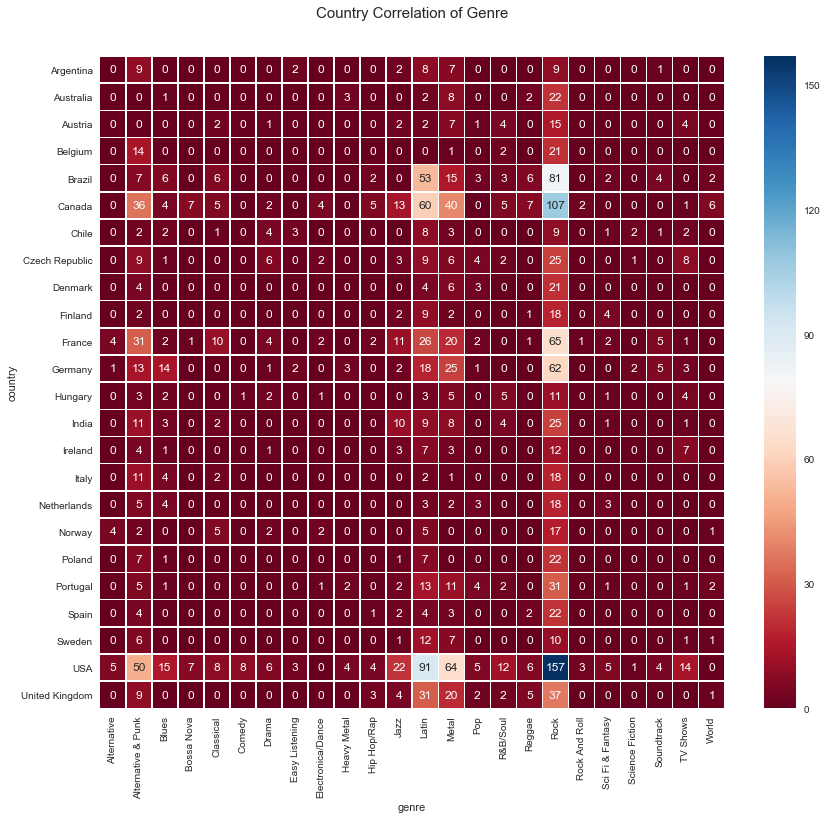

In [42]:
sql = (
    'SELECT C.Country as country, G.Name AS genre, count(*) as qty '
    'FROM Invoice I '
    'INNER JOIN InvoiceLine L ON I.InvoiceId = L.InvoiceId '
    'INNER JOIN Track T ON L.TrackId = T.TrackId '
    'INNER JOIN Genre G ON T.GenreId = G.GenreId '
    'INNER JOIN Customer C ON I.CustomerId = C.CustomerId '
    'GROUP BY 1, 2 '
    'ORDER BY 1, 2, 3 DESC'
)

df = pd.read_sql_query(sql, conn)

pivot = df.pivot(index='country', columns='genre', values='qty')
pivot.fillna(0, inplace=True)

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Country Correlation of Genre', y=1.05, size=15)

#f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(pivot, annot=True, fmt="g", linewidths=.5, cmap=colormap)